In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("../Data/credit_card.csv") # 데이터 불러오기
data = data.drop(["Time", "Amount"], axis = 1) # Time, Amount 제거
data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0
5,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,0
6,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,0
7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0
8,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,0


#### Data - Credit Card Fraud Detection Data
1. 28개의 컬럼으로 구성
2. 타겟변수는 Class (0, 1 ; 이진분류)

In [2]:
# 데이터 내 NA값 여부 확인
data.isnull().any() # 만약 존재한다면 0으로 대체 혹은, 해당 열을 제외하고 진행

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
V21      False
V22      False
V23      False
V24      False
V25      False
V26      False
V27      False
V28      False
Class    False
dtype: bool

In [3]:
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 29


In [4]:
data.describe() # 요약 통계량

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


In [5]:
# 종속 변수의 분포 확인
from collections import Counter
Counter(data.Class)

Counter({0: 284315, 1: 492})

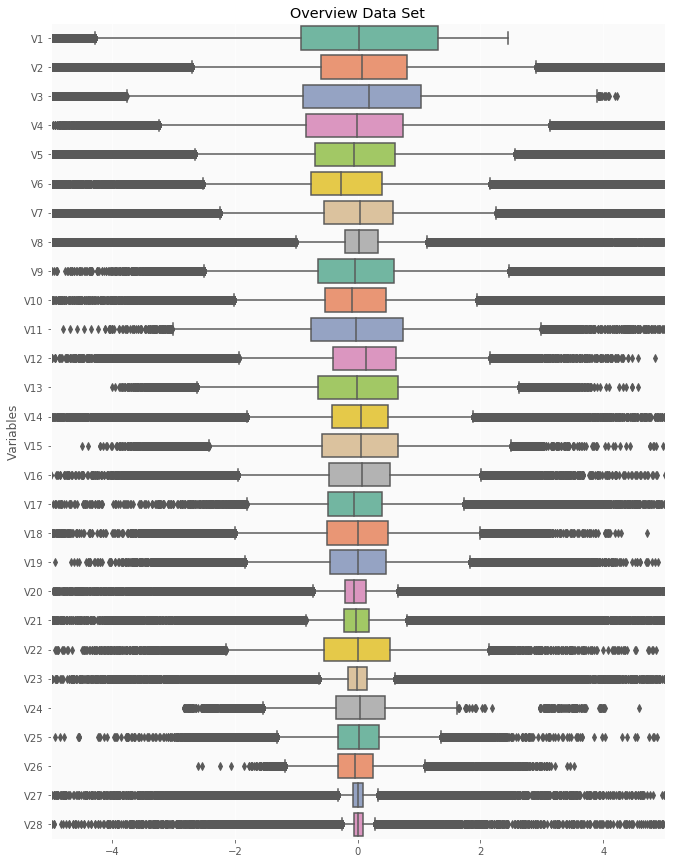

In [6]:
# EDA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot') # Using ggplot2 style visuals 
f, ax = plt.subplots(figsize = (11, 15)) # 그래프 사이즈

ax.set_facecolor('#fafafa') # 그래프 색상값
ax.set(xlim = (-5, 5)) # X축 범위
plt.ylabel('Variables') # Y축 이름
plt.title("Overview Data Set") # 그래프 제목
ax = sns.boxplot(data = data.drop(columns = ['Class']), # V1 ~ V28 확인
                 orient = 'h', 
                 palette = 'Set2')

<Figure size 432x288 with 0 Axes>

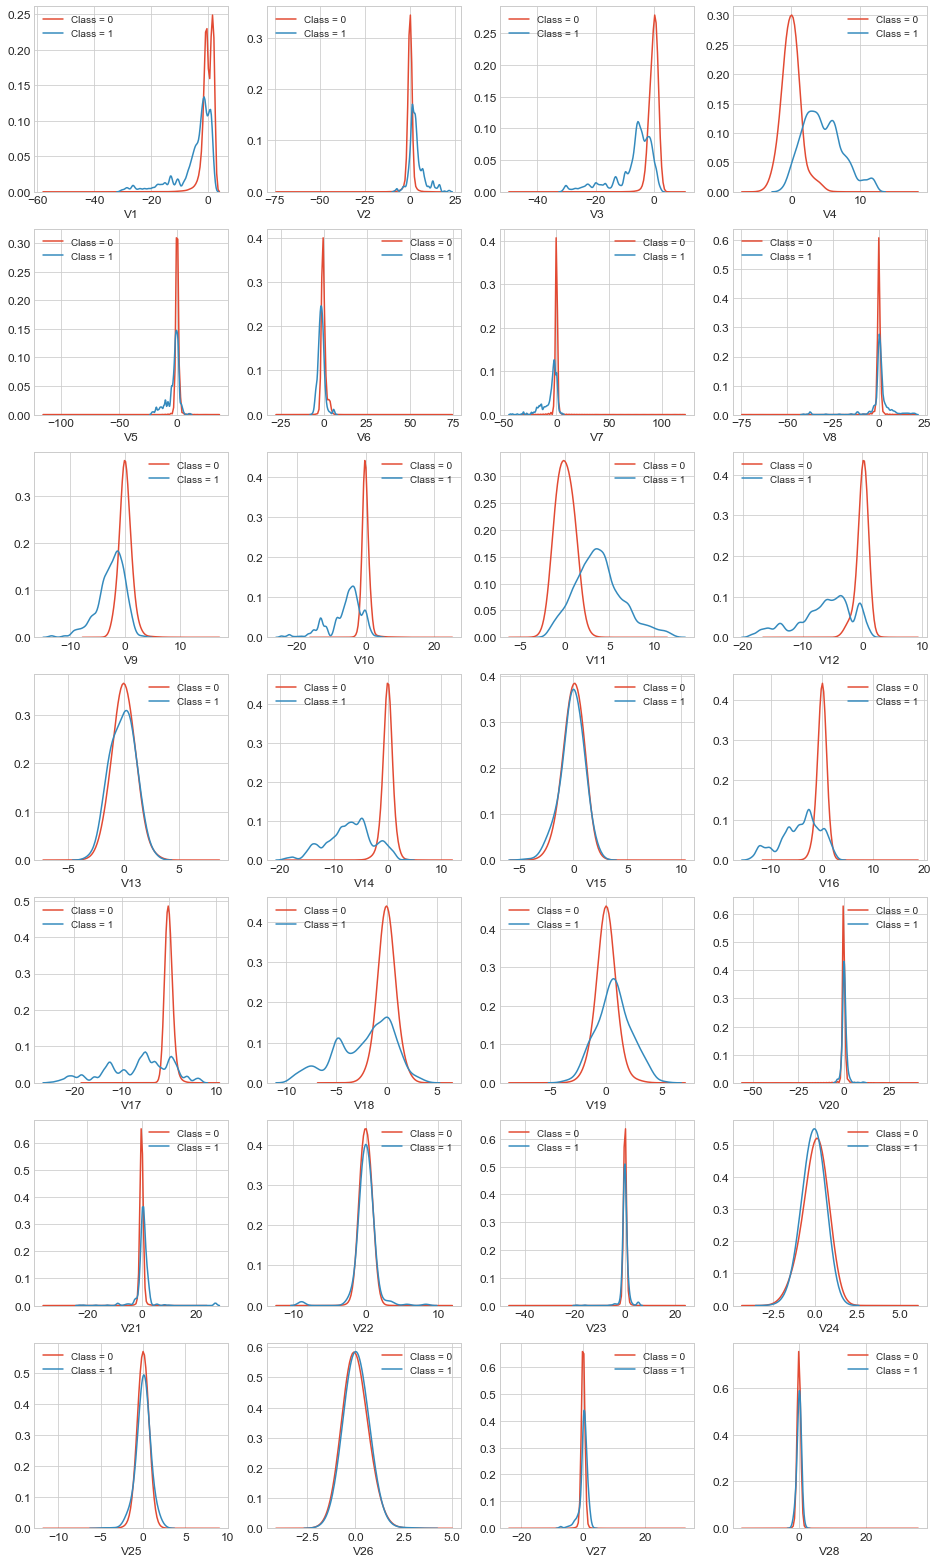

In [7]:
var = data.columns.values[:-1] # V1 ~ V28
i = 0
t0 = data.loc[data['Class'] == 0] # Class : 0 인 행만 추출
t1 = data.loc[data['Class'] == 1] # Class : 1 인 행만 추출

sns.set_style('whitegrid') # 그래프 스타일 지정
plt.figure()
fig, ax = plt.subplots(8, 4, figsize = (16, 28)) # 축 지정

for feature in var:
    i += 1
    plt.subplot(7, 4, i) # 28개의 그래프
    sns.kdeplot(t0[feature], bw = 0.5, label = "Class = 0")
    sns.kdeplot(t1[feature], bw = 0.5, label = "Class = 1")
    plt.xlabel(feature, fontsize = 12) # 라벨 속성값
    locs, labels = plt.xticks()
    plt.tick_params(axis = 'both', which = 'major', labelsize = 12)
plt.show();

#### 각 변수 별 그래프를 타겟변수에 대해서 그려보았을 떄 차이가 있는 변수들은 다음과 같이 정의할 수 있다.
- 1) 타겟 변수에 대해 분포 차이가 많이 나는 변수 : V4, V11
- 2) 타겟 변수에 대해 분포 차이가 비교적 많이 존재하는 변수 : V12, V14, V18
- 3) 타겟 변수에 대해 분포 차이가 비교적 적게 존재하는 변수 : V1, V2, V3, V10

In [8]:
X = np.array(data.iloc[:, data.columns != 'Class'])
y = np.array(data.iloc[:, data.columns == 'Class'])
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

Shape of X: (284807, 28)
Shape of y: (284807, 1)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

## Ir imbalanced ratio  # majarity data/# minority data

Number transactions X_train dataset:  (199364, 28)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 28)
Number transactions y_test dataset:  (85443, 1)


In [10]:
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, classification_report
lgbm_clf = lgbm.LGBMClassifier(n_estimators = 50, random_state = 42) # LGB Classifier
lgbm_clf.fit(X_train, y_train) # 학습 진행
y_pred = lgbm_clf.predict(X_test) # 평가 데이터셋 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, y_pred)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, y_pred)) # 전체적인 성능 평가

C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion_Matrix: 
 [[85128   168]
 [   64    83]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.33      0.56      0.42       147

    accuracy                           1.00     85443
   macro avg       0.66      0.78      0.71     85443
weighted avg       1.00      1.00      1.00     85443



# SMOTE을 이용해서 Over Sampling을 진행해보자!

In [13]:
# 기존의 X_train, y_train, X_test, y_test의 형태 확인
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (199364, 28)
Number transactions y_train dataset:  (199364, 1)
Number transactions X_test dataset:  (85443, 28)
Number transactions y_test dataset:  (85443, 1)


In [14]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # y_train 중 레이블 값이 1인 데이터의 개수
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # y_train 중 레이블 값이 0 인 데이터의 개수

sm = SMOTE(random_state = 42) # SMOTE 알고리즘
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [345]
Before OverSampling, counts of label '0': [199019] 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [15]:
print("Before OverSampling, the shape of X_train: {}".format(X_train.shape)) # SMOTE 적용 이전 데이터 형태
print("Before OverSampling, the shape of y_train: {}".format(y_train.shape)) # SMOTE 적용 이전 데이터 형태
print('After OverSampling, the shape of X_train: {}'.format(X_train_res.shape)) # SMOTE 적용 결과 확인
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_res.shape)) # # SMOTE 적용 결과 확인

Before OverSampling, the shape of X_train: (199364, 28)
Before OverSampling, the shape of y_train: (199364, 1)
After OverSampling, the shape of X_train: (398038, 28)
After OverSampling, the shape of y_train: (398038,) 



In [14]:
lgbm_clf2 = lgbm.LGBMClassifier(n_estimators = 50, random_state = 42) # LGB Classifier
lgbm_clf2.fit(X_train_res, y_train_res) # 학습 진행
y_pred2 = lgbm_clf2.predict(X_test) # 평가 데이터셋 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, y_pred2)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, y_pred2)) # 전체적인 성능 평가

Confusion_Matrix: 
 [[85028   268]
 [   20   127]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.32      0.86      0.47       147

    accuracy                           1.00     85443
   macro avg       0.66      0.93      0.73     85443
weighted avg       1.00      1.00      1.00     85443



# BLSM, SVMSM과 비교해보자!

In [16]:
# BLSM (Borderline SMOTE)
from imblearn.over_sampling import BorderlineSMOTE
sm2 = BorderlineSMOTE(random_state = 42) # BLSM 알고리즘 적용
X_train_res2, y_train_res2 = sm2.fit_sample(X_train, y_train.ravel()) # Over Sampling 적용
lgbm_clf3 = lgbm.LGBMClassifier(n_estimators = 50, random_state = 42) # LGB Classifier
lgbm_clf3.fit(X_train_res2, y_train_res2) # 학습 진행
y_pred3 = lgbm_clf3.predict(X_test) # 평가 데이터셋 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, y_pred3)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, y_pred3)) # 전체적인 성능 평가

Confusion_Matrix: 
 [[85253    43]
 [   29   118]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.73      0.80      0.77       147

    accuracy                           1.00     85443
   macro avg       0.87      0.90      0.88     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
# SVMSMOTE
from imblearn.over_sampling import SVMSMOTE
sm3 = SVMSMOTE(random_state = 42) # SVMSMOTE 알고리즘 적용
X_train_res3, y_train_res3 = sm3.fit_sample(X_train, y_train.ravel()) # Over Sampling 적용
lgbm_clf4 = lgbm.LGBMClassifier(n_estimators = 50, random_state = 42) # LGB Classifier
lgbm_clf4.fit(X_train_res3, y_train_res3) # 학습 진행
y_pred4 = lgbm_clf4.predict(X_test) # 평가 데이터셋 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, y_pred4)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, y_pred4)) # 전체적인 성능 평가

Confusion_Matrix: 
 [[85240    56]
 [   25   122]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.69      0.83      0.75       147

    accuracy                           1.00     85443
   macro avg       0.84      0.91      0.88     85443
weighted avg       1.00      1.00      1.00     85443



# F1 Score 기준 가장 좋은 OverSampling은 BLSM이다.
- 이제 다양한 모델에 적용해보자.
- 선형회귀(로지스틱), Random Forest, CatBoost

In [17]:
# BLSM을 이용해서 Oversampling 한 학습 데이터 셋 : X_train_res2, y_train_res2
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(C = 1e+10) 
# sklearn 의 Logistic Regression은 기본적으로 Ridge 정규화가 포함되어 있기 때문에, 
# 정규화 텀을 억제하는 C를 크게 적용한다 (C:Inverse of regularization strength)
lr_model.fit(X_train_res2, y_train_res2) # 로지스틱 회귀 모형 학습
lr_predict = lr_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, lr_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, lr_predict)) # 전체적인 성능 평가

C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_Matrix: 
 [[84378   918]
 [   23   124]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.12      0.84      0.21       147

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [18]:
# 라쏘 로지스틱 회귀모형 학습
lasso_model = LogisticRegression(penalty = 'l1') # Penalty = l1 Regularizer, C = 1.0 (Default))
lasso_model.fit(X_train_res2, y_train_res2) # 라쏘 로지스틱 회귀 모형 학습
lasso_predict = lasso_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, lasso_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, lasso_predict)) # 전체적인 성능 평가

C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_Matrix: 
 [[84367   929]
 [   23   124]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.12      0.84      0.21       147

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [19]:
# 릿지 로지스틱 회귀모형 학습
ridge_model = LogisticRegression(penalty = 'l2') # Default = LogisticRegression()
ridge_model.fit(X_train_res2, y_train_res2) # 릿지 로지스틱 회귀 모형 학습
ridge_predict = ridge_model.predict(X_test) # 학습 결과를 바탕으로 검증 데이터를 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, ridge_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, ridge_predict)) # 전체적인 성능 평가

C:\Users\Justin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion_Matrix: 
 [[84371   925]
 [   23   124]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85296
           1       0.12      0.84      0.21       147

    accuracy                           0.99     85443
   macro avg       0.56      0.92      0.60     85443
weighted avg       1.00      0.99      0.99     85443



In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 10, # 트리 최대 깊이 10
                                             random_state = 42) # 시드값 고정
rf_model = random_forest_model.fit(X_train_res2, y_train_res2) # 학습 진행
rf_predict = rf_model.predict(X_test) # 평가 데이터 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, rf_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, rf_predict)) # 전체적인 성능 평가

Confusion_Matrix: 
 [[85211    85]
 [   26   121]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.59      0.82      0.69       147

    accuracy                           1.00     85443
   macro avg       0.79      0.91      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [17]:
# CatBoost
from catboost import CatBoostClassifier
cat_model = CatBoostClassifier(n_estimators = 50, # 50번 추정
                           max_depth = 10, # 트리 최대 깊이 10
                           random_state = 42, # 시드값 고정
                           verbose = True) # 학습 진행 과정 표시
cat_model.fit(X_train_res2, y_train_res2) # 학습 진행
cat_predict = cat_model.predict(X_test) # 평가 데이터 예측
print("Confusion_Matrix: \n", confusion_matrix(y_test, cat_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, cat_predict)) # 전체적인 성능 평가

Learning rate set to 0.5
0:	learn: 0.0534553	total: 393ms	remaining: 19.2s
1:	learn: 0.0160728	total: 707ms	remaining: 17s
2:	learn: 0.0092665	total: 1.01s	remaining: 15.8s
3:	learn: 0.0064496	total: 1.3s	remaining: 14.9s
4:	learn: 0.0052625	total: 1.62s	remaining: 14.5s
5:	learn: 0.0044458	total: 1.94s	remaining: 14.2s
6:	learn: 0.0041305	total: 2.27s	remaining: 13.9s
7:	learn: 0.0036044	total: 2.59s	remaining: 13.6s
8:	learn: 0.0033298	total: 2.88s	remaining: 13.1s
9:	learn: 0.0026446	total: 3.18s	remaining: 12.7s
10:	learn: 0.0021016	total: 3.48s	remaining: 12.3s
11:	learn: 0.0017576	total: 3.8s	remaining: 12s
12:	learn: 0.0015964	total: 4.11s	remaining: 11.7s
13:	learn: 0.0015456	total: 4.43s	remaining: 11.4s
14:	learn: 0.0014871	total: 4.74s	remaining: 11.1s
15:	learn: 0.0013478	total: 5.06s	remaining: 10.8s
16:	learn: 0.0012798	total: 5.35s	remaining: 10.4s
17:	learn: 0.0012401	total: 5.64s	remaining: 10s
18:	learn: 0.0011032	total: 5.96s	remaining: 9.73s
19:	learn: 0.0010554	tot

# Ensemble의 Ensemble
- 성능이 가장 좋은 CatBoost 모델을 바탕으로 진행

In [20]:
import random
bagging_predict_result = [] # 빈 리스트 생성
number_of_bagging = 10 # Bagging 횟수
for _ in range(number_of_bagging):
    data_index = [data_index for data_index in range(X_train_res2.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, X_train_res2.shape[0]) # 데이터의 1/10 크기만큼 랜덤 샘플링, // 는 소수점 무시
    cat_model = CatBoostClassifier(n_estimators = 50, # 50번 추정
                                   max_depth = 10, # 트리 최대 깊이 10
                                   random_state = 42, # 시드값 고정
                                   verbose = False) # 학습 진행 과정 생략v
    cat_model.fit(X = pd.DataFrame(X_train_res2).iloc[random_data_index, ],
                  y = pd.DataFrame(y_train_res2).iloc[random_data_index])  # 학습 진행 시 선택된 데이터들로만 진행
    cat_predict = cat_model.predict(X_test) # 평가 데이터 예측
    bagging_predict_result.append(cat_predict) # 예측 결과를 bagging_predict_result에 저장
    print(_+1, "Model Evaluation Result:", "\n", classification_report(y_test, cat_predict)) # 전체적인 성능 평가

1 Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.78      0.80      0.79       147

    accuracy                           1.00     85443
   macro avg       0.89      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

2 Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.77      0.81      0.79       147

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.89     85443
weighted avg       1.00      1.00      1.00     85443

3 Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.76      0.81      0.78       147

    accuracy                           1.00     85443
   macro avg       0.88      0.90      0.

# Bagging을 바탕으로 예측한 결과값에 대해 다수결로 예측

In [21]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(X_test.shape[0]): # 테스트 데이터 개수만큼 반복
    temp_predict = [] # 반복문 내 임시 빈 리스트 생성
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 개수 만큼 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    if np.mean(temp_predict) >= 0.5: # 0, 1 이진분류이므로, 예측값의 평균이 0.5보다 크면 1, 아니면 0으로 예측 다수결)
        bagging_predict.append(1)
    elif np.mean(temp_predict) < 0.5: # 예측값의 평균이 0.5보다 낮으면 0으로 결과 저장
        bagging_predict.append(0)
print("Confusion_Matrix: \n", confusion_matrix(y_test, bagging_predict)) # 혼돈행렬
print('\n')
print("Model Evaluation Result: \n", classification_report(y_test, bagging_predict)) # 전체적인 성능 평가

Confusion_Matrix: 
 [[85264    32]
 [   27   120]]


Model Evaluation Result: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.79      0.82      0.80       147

    accuracy                           1.00     85443
   macro avg       0.89      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



# F1-Score가 가장 높은 CatBoost 모형에 대해 Shap Value를 적용하여 변수 별 영향도 파악

In [24]:
import shap
cat_model = CatBoostClassifier(n_estimators = 50, # 50번 추정
                           max_depth = 10, # 트리 최대 깊이 10
                           random_state = 42, # 시드값 고정
                           verbose = True) # 학습 진행 과정 표시
cat_model.fit(X_train_res2, y_train_res2) # 학습 진행
explainer = shap.TreeExplainer(cat_model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산

Learning rate set to 0.5
0:	learn: 0.0534553	total: 347ms	remaining: 17s
1:	learn: 0.0160728	total: 672ms	remaining: 16.1s
2:	learn: 0.0092665	total: 994ms	remaining: 15.6s
3:	learn: 0.0064496	total: 1.3s	remaining: 15s
4:	learn: 0.0052625	total: 1.64s	remaining: 14.7s
5:	learn: 0.0044458	total: 2s	remaining: 14.6s
6:	learn: 0.0041305	total: 2.31s	remaining: 14.2s
7:	learn: 0.0036044	total: 2.63s	remaining: 13.8s
8:	learn: 0.0033298	total: 2.94s	remaining: 13.4s
9:	learn: 0.0026446	total: 3.25s	remaining: 13s
10:	learn: 0.0021016	total: 3.6s	remaining: 12.7s
11:	learn: 0.0017576	total: 3.94s	remaining: 12.5s
12:	learn: 0.0015964	total: 4.26s	remaining: 12.1s
13:	learn: 0.0015456	total: 4.58s	remaining: 11.8s
14:	learn: 0.0014871	total: 4.87s	remaining: 11.4s
15:	learn: 0.0013478	total: 5.22s	remaining: 11.1s
16:	learn: 0.0012798	total: 5.53s	remaining: 10.7s
17:	learn: 0.0012401	total: 5.86s	remaining: 10.4s
18:	learn: 0.0011032	total: 6.2s	remaining: 10.1s
19:	learn: 0.0010554	total: 

In [25]:
shap.initjs() # 자바스크립트 초기화 (그래프 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:]) # 첫 번째 검증 데이터 인스턴스에 대해 Shap Value를 적용하여 시각화
# 빨간색이 영향도가 높으며, 파란색이 영향도가 낮음

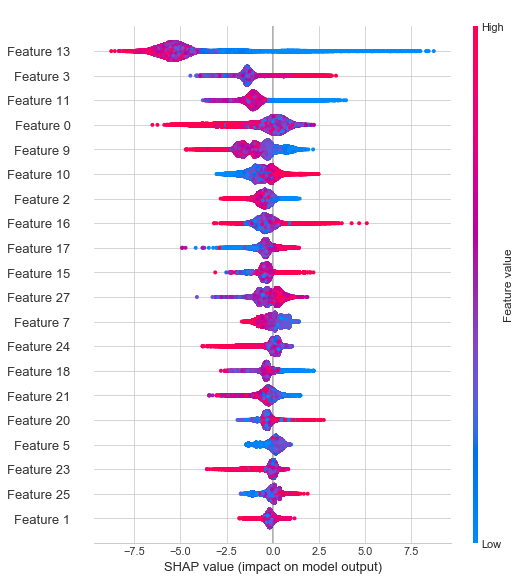

In [27]:
shap.summary_plot(shap_values, X_test)

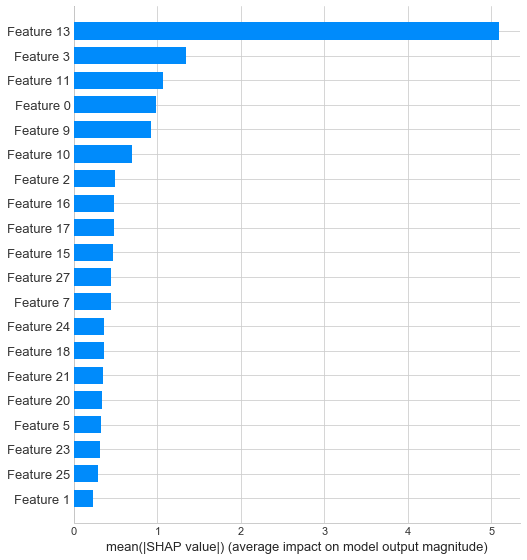

In [28]:
shap.summary_plot(shap_values, X_test, plot_type = "bar") # 각 변수에 대한 Shap Values의 절대값으로 중요도 파악